# Fig 2: Supplementary: Full posterior

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from stg_energy.fig2_inference.viz import pairplot
from stg_energy.common import col, svg, get_labels_8pt
import pandas as pd
import numpy as np
import matplotlib as mpl
from pyloric import create_prior
import matplotlib.pyplot as plt
from copy import deepcopy

In [3]:
path = "../../../results/simulation_data_Tube_MLslurm_cluster"
theta = pd.read_pickle(path + '/close_to_xo_circuit_parameters.pkl')
x = pd.read_pickle(path + '/close_to_xo_simulation_outputs.pkl')
seeds = np.load(path + '/close_to_xo_seeds.npy')
theta_np = theta.to_numpy()
x_np = x.to_numpy()

In [4]:
path = "../../../results/simulation_data_Tube_MLslurm_cluster"
theta = pd.read_pickle(path + '/simulate_27deg_R4_predictives_at_27deg_notau/data/valid_circuit_parameters.pkl')
# x = pd.read_pickle(path + '/close_to_xo_simulation_outputs.pkl')
# seeds = np.load(path + '/close_to_xo_seeds.npy')
theta_np = theta.to_numpy()
# x_np = x.to_numpy()

In [17]:
prior = create_prior(
        customization={
            "Q10_gbar_mem": [True, True, True, True, True, True, True, True],
            "Q10_gbar_syn": [True, True],
            "Q10_tau_m": [False],
            "Q10_tau_h": [False],
            "Q10_tau_CaBuff": [False],
            "Q10_tau_syn": [False, False],
        },
    as_torch_dist=True,
)
lower_bound = prior.support.lower_bound
upper_bound = prior.support.upper_bound
prior_pd = create_prior(
        customization={
            "Q10_gbar_mem": [True, True, True, True, True, True, True, True],
            "Q10_gbar_syn": [True, True],
            "Q10_tau_m": [False],
            "Q10_tau_h": [False],
            "Q10_tau_CaBuff": [False],
            "Q10_tau_syn": [False, False],
        },
)
lims = np.asarray([lower_bound.numpy(), upper_bound.numpy()]).T

In [42]:
from decimal import Decimal
all_labels = []
for dim_i in range(41):
    if dim_i > 31 - 7.5 and dim_i < 31: # synapses
        if dim_i == 24: all_labels.append([r'$\mathdefault{0.01}\;\;\;\;\;\;\;\;\;$           ', r'$\mathdefault{10000}\;\;\;\;\;\;$    '])
        else: all_labels.append([r'$\;\;\mathdefault{0.01}\;\;\;\;\;\;\;$         ', r'$\mathdefault{1000}\;\;\;\;\;$  '])
    else: # membrane conductances
        num_after_digits = -int(np.log10(lims[dim_i, 1]))
        if num_after_digits > 2:
            num_after_digits=2
        labels = [round((lims[dim_i, num_tmp]), num_after_digits) if lims[dim_i, num_tmp] < 1.0 else int(lims[dim_i, num_tmp])
                  for num_tmp in range(2)]
        new_labels = []
        counter=0
        for l in labels:
            if counter == 0:
                new_labels.append(r'$\mathdefault{'+str(l)+'}\;\;\;$      ')
            else:
                new_labels.append(r'$\mathdefault{'+str(l)+'}\;\;\;$   ')
            counter+=1
        all_labels.append(new_labels)

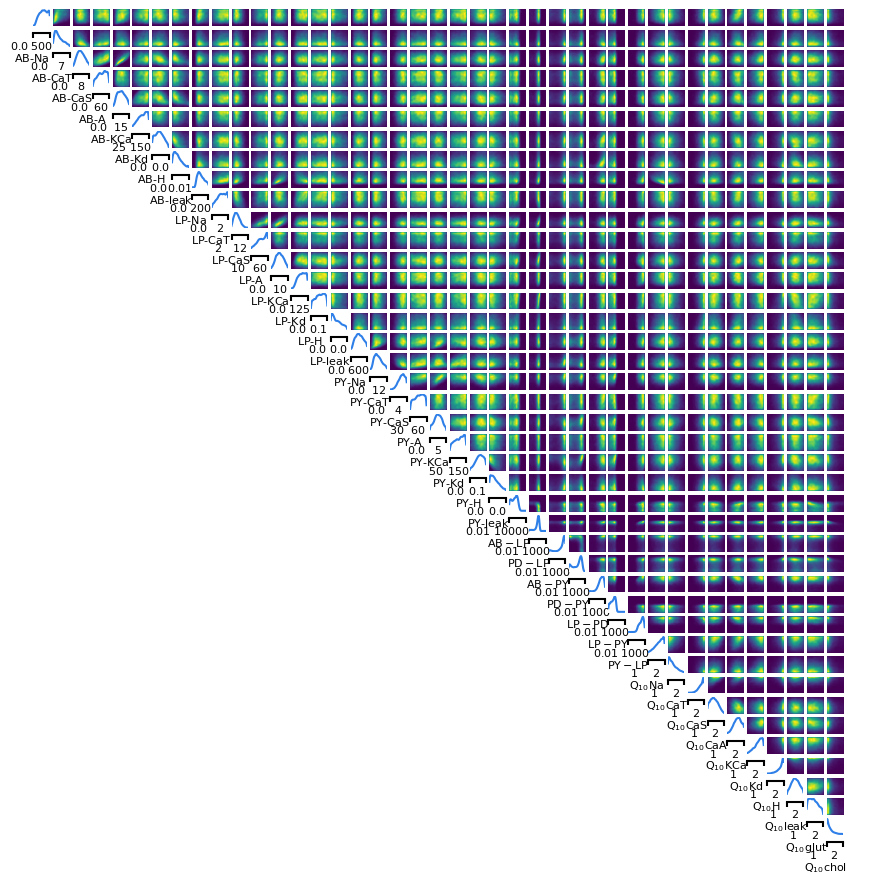

In [43]:
import matplotlib.patheffects as pe

with mpl.rc_context(fname='../../../.matplotlibrc'):

    labels_ = get_labels_8pt()
    new_labels = []
    for l in labels_:
        new_labels.append(l+'      '+r'$\;\;$')
    labels_ = new_labels
    labels_[9] += ''

    fig, axes = pairplot(
        samples=[theta_np[:10000]],
#         subset=[0,1,2,4,10,16,25,38],
        labelpad=0.0,
        tick_labelpad=1,
        limits=lims,
        ticks=lims,
        tick_labels=all_labels,
        fig_size=(10.45, 10.45),
        labels=labels_,
        scatter_offdiag={'rasterized':True, 'alpha':1.0},
        samples_colors=[col['SNPE']],
        diag=['kde'],
        upper=['kde'],
        hist_offdiag={'bins':50},
        plot_offdiag={'linewidth': 1.6, 'path_effects':[pe.Stroke(linewidth=2.4, foreground='k'), pe.Normal()]}
    )

    plt.savefig('../svg/PANEL_supp_full_temp_posterior.svg', facecolor='None', transparent=True)
    plt.show()

In [5]:
import time
import IPython.display as IPd

def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

### Supplementary posterior

In [6]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise
factor_svg=5.5

f = Figure("20.3cm", "20.7cm",

    Panel(
          SVG('../svg/PANEL_supp_full_temp_posterior.svg').scale(svg_scale).move(-10*factor_svg,0*factor_svg),
    ).move(11*factor_svg, 0*factor_svg),
)

!mkdir -p fig
f.save("fig/fig4_supp1.svg")
svg('fig/fig4_supp1.svg')